In [1]:
import pandas as pd
df = pd.read_csv('.\\enron_spam_data.csv')
print(df.head())

   Message ID                       Subject  \
0           0  christmas tree farm pictures   
1           1      vastar resources , inc .   
2           2  calpine daily gas nomination   
3           3                    re : issue   
4           4     meter 7268 nov allocation   

                                             Message Spam/Ham        Date  
0                                                NaN      ham  1999-12-10  
1  gary , production from the high island larger ...      ham  1999-12-13  
2             - calpine daily gas nomination 1 . doc      ham  1999-12-14  
3  fyi - see note below - already done .\nstella\...      ham  1999-12-14  
4  fyi .\n- - - - - - - - - - - - - - - - - - - -...      ham  1999-12-14  


In [2]:
# prompt: change the value ham and spam in Spam/Ham column to 0 and 1

df['Spam/Ham'] = df['Spam/Ham'].replace(['ham', 'spam'], [0, 1])
print(df)



       Message ID                                            Subject  \
0               0                       christmas tree farm pictures   
1               1                           vastar resources , inc .   
2               2                       calpine daily gas nomination   
3               3                                         re : issue   
4               4                          meter 7268 nov allocation   
...           ...                                                ...   
33711       33711  = ? iso - 8859 - 1 ? q ? good _ news _ c = eda...   
33712       33712  all prescript medicines are on special . to be...   
33713       33713              the next generation online pharmacy .   
33714       33714                     bloow in 5 - 10 times the time   
33715       33715                   dear sir , i am interested in it   

                                                 Message  Spam/Ham        Date  
0                                                    N

C:\Users\Esmaeil Khoshnood\AppData\Local\Temp\ipykernel_10476\3462420828.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Spam/Ham'] = df['Spam/Ham'].replace(['ham', 'spam'], [0, 1])


In [3]:
# prompt: remove the column ID and Date and show the dataset as a table

df = df.drop(['Message ID', 'Date'], axis=1)
print(df)


                                                 Subject  \
0                           christmas tree farm pictures   
1                               vastar resources , inc .   
2                           calpine daily gas nomination   
3                                             re : issue   
4                              meter 7268 nov allocation   
...                                                  ...   
33711  = ? iso - 8859 - 1 ? q ? good _ news _ c = eda...   
33712  all prescript medicines are on special . to be...   
33713              the next generation online pharmacy .   
33714                     bloow in 5 - 10 times the time   
33715                   dear sir , i am interested in it   

                                                 Message  Spam/Ham  
0                                                    NaN         0  
1      gary , production from the high island larger ...         0  
2                 - calpine daily gas nomination 1 . doc         0  
3  

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Split the DataFrame into X (features) and y (target)
X = df['Message']  # Features
y = df['Spam/Ham']  # Target variable

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f"X_train shape: {x_train.shape}")
print(f"X_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (26972,)
X_test shape: (6744,)
y_train shape: (26972,)
y_test shape: (6744,)


In [5]:
def remove_null(datas,labels):
    not_null_idx = [i for i,o in enumerate(datas) if o is not None]
    return np.array(datas)[not_null_idx],np.array(labels)[not_null_idx]

In [6]:
import numpy as np
x_train,y_train = remove_null(x_train,y_train)
x_test,y_test = remove_null(x_test,y_test)

# Preprocessing

## Process sentence

In [7]:
import re
import string
from nltk.tokenize import word_tokenize

In [8]:
def remove_hyperlink(word):
    return  re.sub(r"http\S+", "", word)

In [9]:
def to_lower(word):
    result = word.lower()
    return result

In [10]:
def remove_number(word):
    result = re.sub(r'\d+', '', word)
    return result

In [11]:
def remove_punctuation(word):
    result = word.translate(str.maketrans(dict.fromkeys(string.punctuation)))
    return result

In [12]:
def remove_whitespace(word):
    result = word.strip()
    return result

In [13]:
def replace_newline(word):
    return word.replace('\n','')

In [14]:
def clean_up_pipeline(sentence):
    if not isinstance(sentence, str):
        return sentence  # Return the sentence unchanged if it is not a string
    cleaning_utils = [remove_hyperlink,
                      replace_newline,
                      to_lower,
                      remove_number,
                      remove_punctuation,
                      remove_whitespace]
    for o in cleaning_utils:
        sentence = o(sentence)
    return sentence

In [15]:
x_train = [clean_up_pipeline(o) for o in x_train]
x_test = [clean_up_pipeline(o) for o in x_test]

## Process word by word

In [16]:
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stop_words
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [17]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [18]:
from nltk.tokenize import word_tokenize as nltk_word_tokenize

def word_tokenize(sentence):
    if not isinstance(sentence, str):
        return []  # Return an empty list if the input is not a string
    return nltk_word_tokenize(sentence)

x_train = [word_tokenize(o) for o in x_train]
x_test = [word_tokenize(o) for o in x_test]


In [19]:
def remove_stop_words(words):
    result = [i for i in words if i not in sklearn_stop_words]
    return result

In [20]:
def word_stemmer(words):
    return [stemmer.stem(o) for o in words]

In [21]:
def word_lemmatizer(words):
    return [lemmatizer.lemmatize(o) for o in words]

In [22]:
def clean_token_pipeline(words):
    cleaning_utils = [remove_stop_words,word_stemmer,word_lemmatizer]
    for o in cleaning_utils:
        words = o(words)
    return words

In [23]:
x_train = [clean_token_pipeline(o) for o in x_train]
x_test = [clean_token_pipeline(o) for o in x_test]

In [25]:
! pip install gensim



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Neural Network w Embedding From Scratch


In [24]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Conv1D, GRU
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers


In [25]:
## some config values 
embed_size = 100 # how big is each word vector
max_feature = 50000 # how many unique words to use (i.e num rows in embedding vector)
max_len = 2000 # max number of words in a question to use

In [26]:
tokenizer = Tokenizer(num_words=max_feature)

In [27]:
tokenizer.fit_on_texts(x_train)

In [29]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

import numpy as np



# Tokenizing the text data

tokenizer = Tokenizer(num_words=max_feature)

tokenizer.fit_on_texts(x_train)



# Convert text to sequences

x_train_sequences = tokenizer.texts_to_sequences(x_train)

x_test_sequences = tokenizer.texts_to_sequences(x_test)



# Pad the sequences to ensure uniform input size

x_train_features = pad_sequences(x_train_sequences, maxlen=max_len)

x_test_features = pad_sequences(x_test_sequences, maxlen=max_len)



# Now x_train_features and x_test_features can be used as input to a neural network



In [30]:
x_train_features = pad_sequences(x_train_features,maxlen=max_len)
x_test_features = pad_sequences(x_test_features,maxlen=max_len)

In [31]:
embed_size = 100

inp = Input(shape=(max_len,))
x = Embedding(max_feature, embed_size)(inp)
x = Bidirectional(GRU(64, return_sequences=True))(x)
x = GlobalMaxPool1D()(x)
x = Dense(16, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(1, activation="sigmoid")(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 2000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 2000, 100)      │     5,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 2000, 128)      │        63,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,065,825 (19.32 MB)

 Trainable params: 5,065,825 (19.32 MB)

 Non-trainable params: 0 (0.00 B)

None


In [32]:
history = model.fit(x_train_features, y_train, batch_size=512, epochs=20, validation_data=(x_test_features, y_test))

Epoch 1/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 583s 11s/step - accuracy: 0.7790 - loss: 0.5579 - val_accuracy: 0.9650 - val_loss: 0.0840
Epoch 2/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 564s 11s/step - accuracy: 0.9817 - loss: 0.0631 - val_accuracy: 0.9831 - val_loss: 0.0486
Epoch 3/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 560s 11s/step - accuracy: 0.9927 - loss: 0.0284 - val_accuracy: 0.9849 - val_loss: 0.0428
Epoch 4/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 562s 11s/step - accuracy: 0.9951 - loss: 0.0180 - val_accuracy: 0.9858 - val_loss: 0.0417
Epoch 5/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 544s 10s/step - accuracy: 0.9960 - loss: 0.0145 - val_accuracy: 0.9859 - val_loss: 0.0428
Epoch 6/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 546s 10s/step - accuracy: 0.9976 - loss: 0.0097 - val_accuracy: 0.9861 - val_loss: 0.0459
Epoch 7/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 553s 10s/step - accuracy: 0.9970 - loss: 0.0106 - val_accuracy: 0.9849 - val_loss: 0.0567
Epoch 8/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 547s 10s/step - accuracy: 0.9975 - loss: 0.0082 - val_accuracy: 0.

## Evaluation


In [45]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

In [46]:
y_predict  = [1 if o>0.5 else 0 for o in model.predict(x_test_features)]

211/211 [==============================] - 2s 7ms/step


In [47]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()

print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_predict)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_predict)))
print("Accuracy: {:.2f}%".format(100 * accuracy_score(y_test, y_predict)))
print("F1 Score: {:.2f}".format(100 * f1_score(y_test, y_predict)))


Precision: 98.41%
Recall: 97.90%
Accuracy: 98.10%
F1 Score: 98.15


## Error Analysis

### Plot confusion matrix

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

cnf_matrix = confusion_matrix(y_test,y_predict)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Plot normalized confusion matrix

Confusion matrix, without normalization
[[3221   55]
 [  73 3395]]


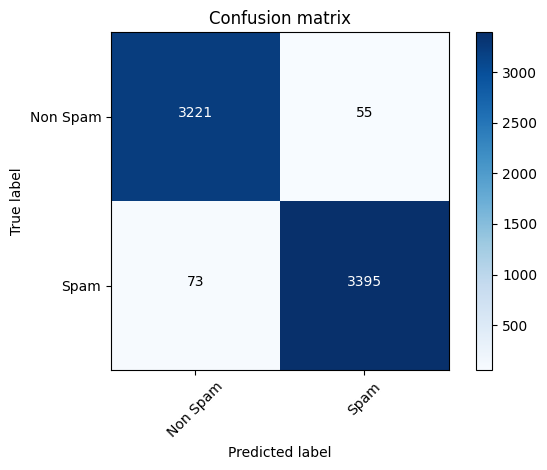

In [49]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non Spam','Spam'], normalize=False,
                      title='Confusion matrix')

# Play around with GloVe Word2vector

In [24]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

# Convert the GloVe file to word2vec format
glove_input_file = 'glove.6B.300d.txt'
word2vec_output_file = 'glove.6B.300d.word2vec.txt'
glove2word2vec(glove_input_file, word2vec_output_file)

# Load the GloVe model in word2vec format
w2v = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

# Now you can use the w2v model as needed
print(w2v['example'])  # This should print the vector for the word 'example'


C:\Users\user\AppData\Local\Temp\ipykernel_14776\1774074038.py:7: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, word2vec_output_file)


[-0.20297    0.010222   0.063166  -0.23259    0.063991   0.13313
 -0.12547   -0.12964   -0.2553    -1.7295     0.091936   0.021622
 -0.31398    0.011587   0.2258    -0.15155   -0.081282  -0.22776
  0.0030483 -0.2752     0.010934   0.05136    0.22624    0.43196
  0.012415  -0.25724   -0.093916  -0.10665   -0.071235  -0.10342
 -0.098095   0.48373   -0.67475   -0.10943   -0.50882   -0.05844
  0.15398   -0.17816   -0.39477    0.066937   0.041519  -0.085288
 -0.21029    0.2462    -0.37551   -0.22549   -0.082648   0.37232
 -0.14809    0.0786     0.11278   -0.10294    0.37601    0.15898
 -0.17571   -0.063246  -0.08103   -0.10676    0.094943   0.28391
  0.35478    0.10635    0.51442   -0.10787   -0.14091   -0.087904
 -0.15251    0.1862     0.14508    0.28751   -0.36265   -0.054447
  0.083526   0.015638  -0.38204   -0.10227   -0.022685   0.24539
 -0.14744   -0.13984   -0.29816   -0.079155  -0.042634  -0.20823
  0.32099    0.11908   -0.10361    0.36009   -0.097773  -0.095832
 -0.22441    0.40845

In [29]:
w2v.most_similar('music')


[('musical', 0.6985518932342529),
 ('songs', 0.6906880140304565),
 ('dance', 0.6395722031593323),
 ('pop', 0.6392293572425842),
 ('recording', 0.6246087551116943),
 ('jazz', 0.6203824877738953),
 ('musicians', 0.610777735710144),
 ('song', 0.6069643497467041),
 ('concert', 0.5930524468421936),
 ('composer', 0.591019332408905)]

In [32]:
# guitar + drums - strings = ?
w2v.most_similar(['guitar', 'drums'], negative=['strings'], topn=1)


[('drummer', 0.6636423468589783)]

In [35]:
w2v.doesnt_match("guitar piano drums apple".split())


'apple'

In [34]:
w2v.doesnt_match("violin flute guitar tiger".split())


'tiger'

## Fine-Tuning with Word Embedding Glove

In [32]:
! pip install keras
! pip install tensorflow
!! pip install keras-preprocessing
!! pip install keras-layers

     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 2.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   -------------------------------- ------- 0.9/1.1 MB 19.8 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 14.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/133.7 kB ? eta -:--:--
   ---------------------------------------- 133.7/133.7 kB 7.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
   --------------------------- ------------ 2.0/3.0 MB 43.1 MB/s eta 0:00:01
   ---------------------------------------  3.0/3.0 MB 37.9 MB/s eta 0:00:01
   ---------------------------------------- 3.0/3.0 MB 27.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/126.8 kB ? eta -:--:--
   ---------------------------------------- 126.8/126.8 kB 7.3 MB/s eta 0:00:00
   --------------------


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Esmaeil Khoshnood\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


  Using cached wheel-0.44.0-py3-none-any.whl.metadata (2.3 kB)
   ---------------------------------------- 0.0/385.0 MB ? eta -:--:--
   ---------------------------------------- 1.1/385.0 MB 36.3 MB/s eta 0:00:11
   ---------------------------------------- 3.3/385.0 MB 34.9 MB/s eta 0:00:11
    --------------------------------------- 5.3/385.0 MB 37.5 MB/s eta 0:00:11
    --------------------------------------- 6.2/385.0 MB 36.3 MB/s eta 0:00:11
    --------------------------------------- 7.9/385.0 MB 36.1 MB/s eta 0:00:11
   - -------------------------------------- 9.9/385.0 MB 37.3 MB/s eta 0:00:11
   - -------------------------------------- 11.6/385.0 MB 38.5 MB/s eta 0:00:10
   - -------------------------------------- 13.3/385.0 MB 36.4 MB/s eta 0:00:11
   - -------------------------------------- 15.0/385.0 MB 36.4 MB/s eta 0:00:11
   - -------------------------------------- 16.7/385.0 MB 38.6 MB/s eta 0:00:10
   - -------------------------------------- 18.4/385.0 MB 38.5 MB/s eta 


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Esmaeil Khoshnood\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



   ---- ----------------------------------- 45.1/385.0 MB 34.4 MB/s eta 0:00:10
   ---- ----------------------------------- 47.1/385.0 MB 38.5 MB/s eta 0:00:09
   ----- ---------------------------------- 49.2/385.0 MB 38.5 MB/s eta 0:00:09
   ----- ---------------------------------- 51.2/385.0 MB 40.9 MB/s eta 0:00:09
   ----- ---------------------------------- 53.3/385.0 MB 46.7 MB/s eta 0:00:08
   ----- ---------------------------------- 55.3/385.0 MB 43.7 MB/s eta 0:00:08
   ----- ---------------------------------- 57.2/385.0 MB 40.9 MB/s eta 0:00:09
   ------ --------------------------------- 58.7/385.0 MB 43.7 MB/s eta 0:00:08
   ------ --------------------------------- 60.9/385.0 MB 40.9 MB/s eta 0:00:08
   ------ --------------------------------- 63.0/385.0 MB 43.7 MB/s eta 0:00:08
   ------ --------------------------------- 65.1/385.0 MB 43.5 MB/s eta 0:00:08
   ------ --------------------------------- 67.2/385.0 MB 43.5 MB/s eta 0:00:08
   ------- ----------------------------

['ERROR: Could not find a version that satisfies the requirement keras-layers (from versions: none)',
 'ERROR: No matching distribution found for keras-layers',
 '',
 '[notice] A new release of pip is available: 24.0 -> 24.2',
 '[notice] To update, run: C:\\Users\\Esmaeil Khoshnood\\AppData\\Local\\Microsoft\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\python.exe -m pip install --upgrade pip']

# Extract Features from Words


## Use Glove Pre-train


In [35]:
!! pip install matplotlib


['Collecting matplotlib',
 '  Using cached matplotlib-3.9.2-cp311-cp311-win_amd64.whl.metadata (11 kB)',
 'Collecting contourpy>=1.0.1 (from matplotlib)',
 '  Using cached contourpy-1.2.1-cp311-cp311-win_amd64.whl.metadata (5.8 kB)',
 'Collecting cycler>=0.10 (from matplotlib)',
 '  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)',
 'Requirement already satisfied: fonttools>=4.22.0 in c:\\users\\esmaeil khoshnood\\appdata\\local\\packages\\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\\localcache\\local-packages\\python311\\site-packages (from matplotlib) (4.53.1)',
 'Requirement already satisfied: kiwisolver>=1.3.1 in c:\\users\\esmaeil khoshnood\\appdata\\local\\packages\\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\\localcache\\local-packages\\python311\\site-packages (from matplotlib) (1.4.5)',
 'Requirement already satisfied: numpy>=1.23 in c:\\users\\esmaeil khoshnood\\appdata\\local\\packages\\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\\localcach

In [37]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Conv1D, GRU
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers

In [38]:
maxlen = 2000
max_features = 50000

In [39]:
EMBEDDING_FILE = 'glove.6B.300d.txt'
tokenizer = Tokenizer(num_words=max_features)

In [40]:
tokenizer.fit_on_texts(x_train)

In [41]:
x_train_sequences = tokenizer.texts_to_sequences(x_train)
x_test_sequences = tokenizer.texts_to_sequences(x_test)

x_train_features = pad_sequences(x_train_sequences, maxlen=maxlen)
x_test_features = pad_sequences(x_test_sequences, maxlen=maxlen)

# Now x_train_features and x_test_features are ready to be used for model input


In [43]:
import numpy as np

def get_coefs(word, *arr):
    return word, np.asarray(arr, dtype='float32')

# Specify the correct encoding, typically 'utf-8'
with open(EMBEDDING_FILE, encoding='utf-8') as f:
    embeddings_index = dict(get_coefs(*o.strip().split(" ")) for o in f)

# Convert the dictionary values to a list
all_embs = np.stack(list(embeddings_index.values()))
emb_mean, emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

print(f"Embedding size: {embed_size}")
print(f"Mean of embeddings: {emb_mean}")
print(f"Standard deviation of embeddings: {emb_std}")


Embedding size: 300
Mean of embeddings: -0.003905011573806405
Standard deviation of embeddings: 0.3817702829837799


In [44]:
! pip install keras-tuner
! pip show tensorflow keras keras-tuner
! pip install keras-models
! pip install keras-random

   ---------------------------------------- 0.0/129.1 kB ? eta -:--:--
   ---------------------------------------- 129.1/129.1 kB 3.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Esmaeil Khoshnood\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Name: tensorflow
Version: 2.17.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: C:\Users\Esmaeil Khoshnood\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages
Requires: tensorflow-intel
Required-by: 
---
Name: keras
Version: 3.5.0
Summary: Multi-backend Keras.
Home-page: https://github.com/keras-team/keras
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache License 2.0
Location: C:\Users\Esmaeil Khoshnood\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages
Requires: absl-py, h5py, ml-dtypes, namex, numpy, optree, packaging, rich
Required-by: keras-tuner, tensorflow-intel
---
Name: keras-tuner
Version: 1.4.7
Summary: A Hyperparameter Tuning Library for Keras
Home-


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Esmaeil Khoshnood\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement keras-random (from versions: none)
ERROR: No matching distribution found for keras-random

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Esmaeil Khoshnood\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [45]:
from sklearn.model_selection import train_test_split
# Split the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    x_train_features, y_train, test_size=0.2, random_state=42
)

In [46]:
import numpy as np
import keras_tuner as kt
from keras.layers import Input, Embedding, Bidirectional, GRU, GlobalMaxPool1D, Dense, Dropout
from keras.models import Model
from keras.optimizers import Adam

# Define hyperparameters
max_features = 50000  # Maximum number of words to use (vocabulary size)
embed_size = 100      # Update this to match the dimension of your pre-trained embeddings
maxlen = 2000         # Maximum length of input sequences
gru_units = 64        # Number of units in the GRU layer

# Embedding initialization parameters
emb_mean = 0.0
emb_std = 1.0

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))

# Initialize the embedding matrix with random values
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))

# Populate the embedding matrix with pre-trained word vectors
for word, i in word_index.items():
    if i >= max_features:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None and len(embedding_vector) == embed_size:
        embedding_matrix[i] = embedding_vector

# Define the model building function
def build_model(hp):
    inp = Input(shape=(maxlen,))
    x = Embedding(
        input_dim=nb_words,
        output_dim=embed_size,
        weights=[embedding_matrix],
        input_length=maxlen,
        trainable=True,  # Allow fine-tuning of embeddings
    )(inp)
    
    x = Bidirectional(GRU(units=gru_units, return_sequences=True, dropout=hp.Float('gru_dropout', 0.0, 0.5, step=0.1)))(x)
    x = GlobalMaxPool1D()(x)
    x = Dense(units=hp.Int('dense_units', min_value=8, max_value=64, step=8), activation="relu")(x)
    x = Dropout(rate=hp.Float('dropout_rate', 0.0, 0.5, step=0.1))(x)
    x = Dense(units=1, activation="sigmoid")(x)

    # Compile the model
    optimizer = Adam(learning_rate=hp.Float('learning_rate', 1e-4, 1e-2, sampling='log'))
    model = Model(inputs=inp, outputs=x)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    
    return model

# Define the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Number of different models to try
    executions_per_trial=1,  # Number of models to train per trial
    directory='tuner_results',  # Directory to save results
    project_name='text_classification_tuning'
)

# Perform hyperparameter search
tuner.search(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of dense units is {best_hps.get('dense_units')},
the optimal dropout rate is {best_hps.get('dropout_rate')}, and the optimal learning rate is {best_hps.get('learning_rate')}.
""")

# Build the best model
model = tuner.hypermodel.build(best_hps)

# Display the model summary
print(model.summary())


Trial 10 Complete [01h 42m 32s]
val_accuracy: 0.9836885929107666

Best val_accuracy So Far: 0.9868396520614624
Total elapsed time: 16h 53m 21s

The hyperparameter search is complete. The optimal number of dense units is 16,
the optimal dropout rate is 0.0, and the optimal learning rate is 0.003993492840731953.



Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 2000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 2000, 100)      │     5,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 2000, 128)      │        63,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,065,825 (19.32 MB)

 Trainable params: 5,065,825 (19.32 MB)

 Non-trainable params: 0 (0.00 B)

None


In [47]:
print(f"x_train_features shape: {x_train_features.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test_features shape: {x_test_features.shape}")
print(f"y_test shape: {y_test.shape}")

x_train_features shape: (26972, 2000)
y_train shape: (21577,)
x_test_features shape: (6744, 2000)
y_test shape: (6744,)


In [49]:
# Assuming x_train_features is larger than y_train
min_train_samples = min(x_train_features.shape[0], y_train.shape[0])
x_train_features = x_train_features[:min_train_samples]
y_train = y_train[:min_train_samples]

# Assuming x_test_features is larger than y_test
min_test_samples = min(x_test_features.shape[0], y_test.shape[0])
x_test_features = x_test_features[:min_test_samples]
y_test = y_test[:min_test_samples]

# After aligning the data, you can proceed with training
history = model.fit(x_train_features, y_train, batch_size=512, epochs=20, 
                    validation_data=(x_test_features, y_test))



Epoch 1/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 479s 11s/step - accuracy: 0.5043 - loss: 0.7069 - val_accuracy: 0.4945 - val_loss: 0.6940
Epoch 2/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 461s 11s/step - accuracy: 0.5172 - loss: 0.6924 - val_accuracy: 0.5163 - val_loss: 0.6955
Epoch 3/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 446s 10s/step - accuracy: 0.5109 - loss: 0.6925 - val_accuracy: 0.4640 - val_loss: 0.7002
Epoch 4/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 446s 10s/step - accuracy: 0.5330 - loss: 0.6891 - val_accuracy: 0.4616 - val_loss: 0.7005
Epoch 5/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 448s 10s/step - accuracy: 0.5522 - loss: 0.6847 - val_accuracy: 0.4815 - val_loss: 0.7095
Epoch 6/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 448s 10s/step - accuracy: 0.5691 - loss: 0.6746 - val_accuracy: 0.4801 - val_loss: 0.7108
Epoch 7/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 438s 10s/step - accuracy: 0.6121 - loss: 0.6593 - val_accuracy: 0.4911 - val_loss: 0.7334
Epoch 8/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 446s 10s/step - accuracy: 0.6258 - loss: 0.6413 - val_accuracy: 0.

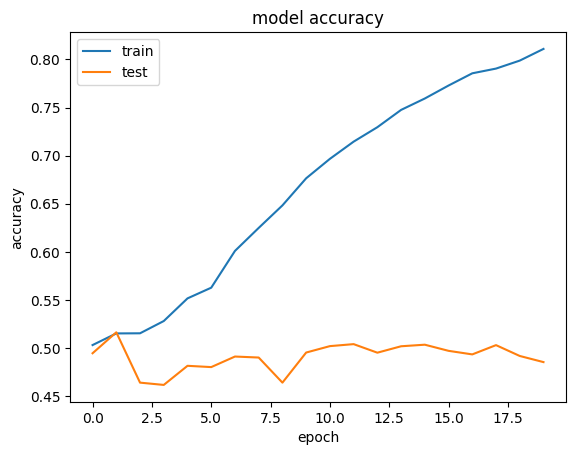

In [50]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [51]:
from sklearn.metrics import confusion_matrix,f1_score, precision_score,recall_score


In [52]:
y_predict  = [1 if o>0.5 else 0 for o in model.predict(x_test_features)]

211/211 ━━━━━━━━━━━━━━━━━━━━ 100s 466ms/step


In [53]:
confusion_matrix(y_test,y_predict)

array([[1307, 1969],
       [1502, 1966]], dtype=int64)

In [54]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score


tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()

print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_predict)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_predict)))
print("Accuracy: {:.2f}%".format(100 * accuracy_score(y_test, y_predict)))
print("F1 Score: {:.2f}".format(100 * f1_score(y_test, y_predict)))


Precision: 49.96%
Recall: 56.69%
Accuracy: 48.53%
F1 Score: 53.11


In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

cnf_matrix = confusion_matrix(y_test,y_predict)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[1307 1969]
 [1502 1966]]


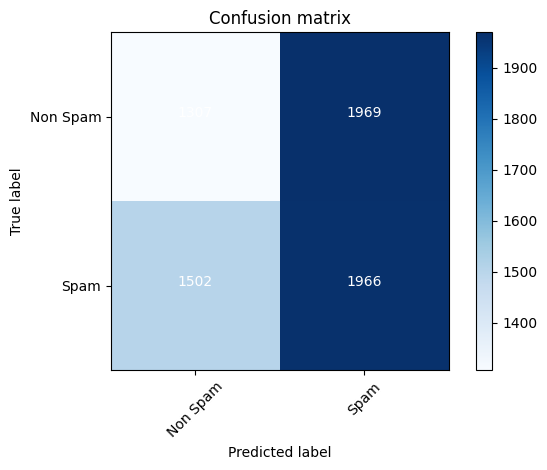

In [56]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non Spam','Spam'], normalize=False,
                      title='Confusion matrix')

## GRU with Pre-trained Word Embedding GloVe

In [70]:
word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector
        
inp = Input(shape=(maxlen,))
x = Embedding(max_features, embed_size, weights=[embedding_matrix])(inp)
x = Bidirectional(GRU(64, return_sequences=True))(x)
x = GlobalMaxPool1D()(x)
x = Dense(16, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(1, activation="sigmoid")(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 2000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_4 (Embedding)         │ (None, 2000, 300)      │    15,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 2000, 128)      │       140,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_4          │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,142,625 (57.76 MB)

 Trainable params: 15,142,625 (57.76 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
model.layers[1].trainable = False

In [ ]:
history = model.fit(x_train_features,y_train, batch_size=512, epochs=20, 
          validation_data=(x_test_features, y_test))



Epoch 1/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1721s 33s/step - accuracy: 0.7561 - loss: 0.5416 - val_accuracy: 0.9442 - val_loss: 0.1596
Epoch 2/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 2718s 52s/step - accuracy: 0.9513 - loss: 0.1422 - val_accuracy: 0.9655 - val_loss: 0.0990
Epoch 3/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 3751s 71s/step - accuracy: 0.9711 - loss: 0.0867 - val_accuracy: 0.9724 - val_loss: 0.0737
Epoch 4/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 4108s 78s/step - accuracy: 0.9815 - loss: 0.0590 - val_accuracy: 0.9743 - val_loss: 0.0710
Epoch 5/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 4142s 78s/step - accuracy: 0.9850 - loss: 0.0472 - val_accuracy: 0.9786 - val_loss: 0.0593
Epoch 6/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 4160s 79s/step - accuracy: 0.9892 - loss: 0.0365 - val_accuracy: 0.9803 - val_loss: 0.0599
Epoch 7/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 4174s 79s/step - accuracy: 0.9911 - loss: 0.0294 - val_accuracy: 0.9806 - val_loss: 0.0561
Epoch 8/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 4158s 79s/step - accuracy: 0.9934 - loss: 0.0228 - val_accu

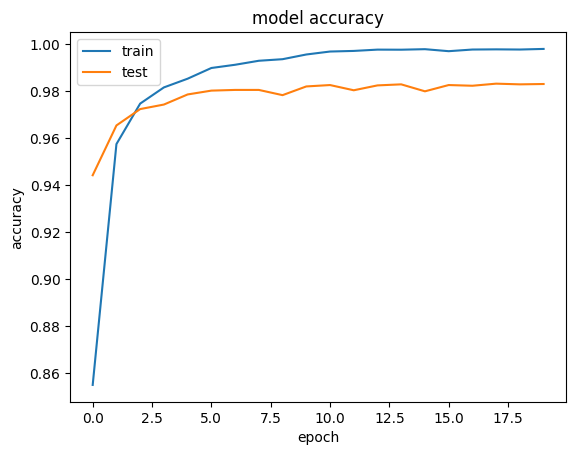

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix,f1_score, precision_score,recall_score

In [ ]:
y_predict  = [1 if o>0.5 else 0 for o in model.predict(x_test_features)]

211/211 ━━━━━━━━━━━━━━━━━━━━ 190s 884ms/step


In [ ]:
confusion_matrix(y_test,y_predict)

array([[3185,   91],
       [  23, 3445]], dtype=int64)

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score


tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()

print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_predict)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_predict)))
print("Accuracy: {:.2f}%".format(100 * accuracy_score(y_test, y_predict)))
print("F1 Score: {:.2f}".format(100 * f1_score(y_test, y_predict)))


Precision: 97.43%
Recall: 99.34%
Accuracy: 98.31%
F1 Score: 98.37


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

cnf_matrix = confusion_matrix(y_test,y_predict)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[3185   91]
 [  23 3445]]


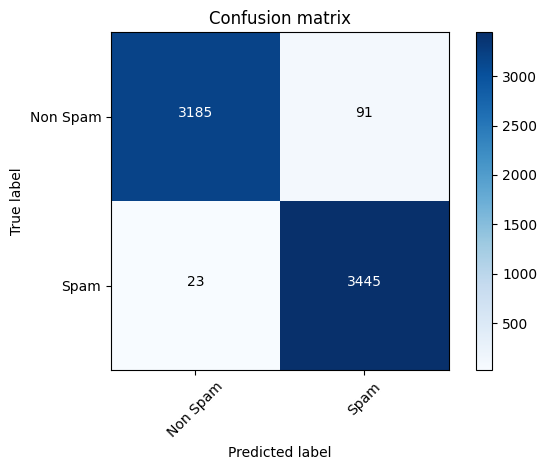

In [ ]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non Spam','Spam'], normalize=False,
                      title='Confusion matrix')